## Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from tensorflow.keras.callbacks import EarlyStopping

## Analisando DataSet

In [2]:
data = pd.read_csv('Student Depression Dataset.csv')
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [3]:
nulos = data[data.isnull().any(axis = 1)]
nulos

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4458,22377,Female,32.0,Varanasi,Student,3.0,0.0,5.64,1.0,0.0,5-6 hours,Healthy,BCA,No,12.0,NaN,No,1
13596,68910,Male,29.0,Hyderabad,Student,2.0,0.0,8.94,3.0,0.0,Less than 5 hours,Unhealthy,B.Ed,No,12.0,NaN,Yes,0
19266,97610,Female,20.0,Kolkata,Student,1.0,0.0,6.83,1.0,0.0,5-6 hours,Healthy,MBBS,No,9.0,NaN,Yes,0


In [4]:
data = data.dropna()
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [5]:
data['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8309
7-8 hours            7346
5-6 hours            6181
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

In [6]:
data['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10316
Moderate      9921
Healthy       7649
Others          12
Name: count, dtype: int64

In [7]:
data['Work Pressure'].value_counts()

Work Pressure
0.0    27895
5.0        2
2.0        1
Name: count, dtype: int64

In [8]:
# y
data['Depression'].value_counts()

Depression
1    16335
0    11563
Name: count, dtype: int64

In [9]:
data_1 = data[data['Depression'] == 1]  
data_0 = data[data['Depression'] == 0]  
data_reduzido_1 = data_1.sample(n=13563, random_state=42)
data = pd.concat([data_reduzido_1, data_0])
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data['Depression'].value_counts()

Depression
1    12563
0    11563
Name: count, dtype: int64

In [10]:
data['Depression'].value_counts()

Depression
1    12563
0    11563
Name: count, dtype: int64

In [11]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,22305,Female,19.0,Bhopal,Student,5.0,0.0,5.58,1.0,0.0,Less than 5 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,1
1,63896,Female,23.0,Agra,Student,2.0,0.0,5.67,3.0,0.0,Less than 5 hours,Moderate,M.Com,Yes,0.0,1.0,Yes,0
2,36194,Male,22.0,Kalyan,Student,1.0,0.0,7.94,3.0,0.0,7-8 hours,Moderate,MSc,Yes,9.0,3.0,Yes,1
3,58250,Female,23.0,Srinagar,Student,2.0,0.0,7.04,4.0,0.0,7-8 hours,Healthy,PhD,No,11.0,1.0,No,0
4,122310,Female,20.0,Pune,Student,5.0,0.0,5.46,5.0,0.0,5-6 hours,Healthy,Class 12,No,7.0,2.0,Yes,1


In [12]:
X = data.iloc[:, [1,2,5,7,8,10,11,13,14,15,16]].values
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,Female,19.0,5.0,5.58,1.0,Less than 5 hours,Moderate,Yes,3.0,3.0,Yes
1,Female,23.0,2.0,5.67,3.0,Less than 5 hours,Moderate,Yes,0.0,1.0,Yes
2,Male,22.0,1.0,7.94,3.0,7-8 hours,Moderate,Yes,9.0,3.0,Yes
3,Female,23.0,2.0,7.04,4.0,7-8 hours,Healthy,No,11.0,1.0,No
4,Female,20.0,5.0,5.46,5.0,5-6 hours,Healthy,No,7.0,2.0,Yes


In [13]:
y = data.iloc[:, -1].values
y

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

## Separação e Transformação

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,Female,33.0,1.0,8.44,3.0,7-8 hours,Healthy,No,2.0,4.0,Yes
1,Female,24.0,1.0,6.83,1.0,5-6 hours,Healthy,No,7.0,5.0,Yes
2,Female,26.0,4.0,9.74,5.0,7-8 hours,Moderate,No,10.0,4.0,No
3,Male,20.0,2.0,7.47,1.0,More than 8 hours,Unhealthy,Yes,4.0,3.0,No
4,Male,30.0,3.0,7.22,3.0,5-6 hours,Moderate,No,11.0,1.0,No


In [16]:
lb = LabelEncoder()
for col in [0, 7, 10,]:
    X_train[:, col] = lb.fit_transform(X_train[:, col])
    X_test[:, col] = lb.transform(X_test[:, col])

In [17]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0,33.0,1.0,8.44,3.0,7-8 hours,Healthy,0,2.0,4.0,1
1,0,24.0,1.0,6.83,1.0,5-6 hours,Healthy,0,7.0,5.0,1
2,0,26.0,4.0,9.74,5.0,7-8 hours,Moderate,0,10.0,4.0,0
3,1,20.0,2.0,7.47,1.0,More than 8 hours,Unhealthy,1,4.0,3.0,0
4,1,30.0,3.0,7.22,3.0,5-6 hours,Moderate,0,11.0,1.0,0


In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train[:, [1, 2, 3, 4, 8, 9]] = scaler.fit_transform(X_train[:, [1, 2, 3, 4, 8, 9]])
X_test[:, [1, 2, 3, 4, 8, 9]] = scaler.transform(X_test[:, [1, 2, 3, 4, 8, 9]])

In [19]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0,0.365854,0.2,0.844,0.6,7-8 hours,Healthy,0,0.166667,0.75,1
1,0,0.146341,0.2,0.683,0.2,5-6 hours,Healthy,0,0.583333,1.0,1
2,0,0.195122,0.8,0.974,1.0,7-8 hours,Moderate,0,0.833333,0.75,0
3,1,0.04878,0.4,0.747,0.2,More than 8 hours,Unhealthy,1,0.333333,0.5,0
4,1,0.292683,0.6,0.722,0.6,5-6 hours,Moderate,0,0.916667,0.0,0


In [20]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5, 6])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [21]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.365854,0.2,0.844,0.6,0,0.166667,0.75,1
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.146341,0.2,0.683,0.2,0,0.583333,1.0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.195122,0.8,0.974,1.0,0,0.833333,0.75,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0.04878,0.4,0.747,0.2,1,0.333333,0.5,0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.292683,0.6,0.722,0.6,0,0.916667,0.0,0


## Rede Neural Para Classificação

In [22]:
early_stopping = EarlyStopping(
    monitor='val_loss',         # Monitorar a perda (loss) no conjunto de validação
    patience=15,                  # Número de épocas sem melhoria antes de interromper o treinamento
    restore_best_weights=True   # Restaura os pesos do modelo para os melhores encontrados durante o treinamento
)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units= 212 ,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid') 
])

In [24]:
model.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
X_test = np.array(X_test, dtype=float)
X_train = np.array(X_train, dtype=float)

In [26]:
r = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7590 - loss: 0.5024 - val_accuracy: 0.8382 - val_loss: 0.3658
Epoch 2/100
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8406 - loss: 0.3667 - val_accuracy: 0.8400 - val_loss: 0.3628
Epoch 3/100
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8416 - loss: 0.3637 - val_accuracy: 0.8425 - val_loss: 0.3622
Epoch 4/100
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8440 - loss: 0.3624 - val_accuracy: 0.8444 - val_loss: 0.3624
Epoch 5/100
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8434 - loss: 0.3558 - val_accuracy: 0.8467 - val_loss: 0.3616
Epoch 6/100
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8408 - loss: 0.3580 - val_accuracy: 0.8438 - val_loss: 0.3607
Epoch 7/100
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8398 - loss: 0.3650 - val_accuracy: 0.8460 - val_loss: 0.3612
Epoch 8/100
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8437 - loss: 0.3572 - val_accu

In [27]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step


## Resultados

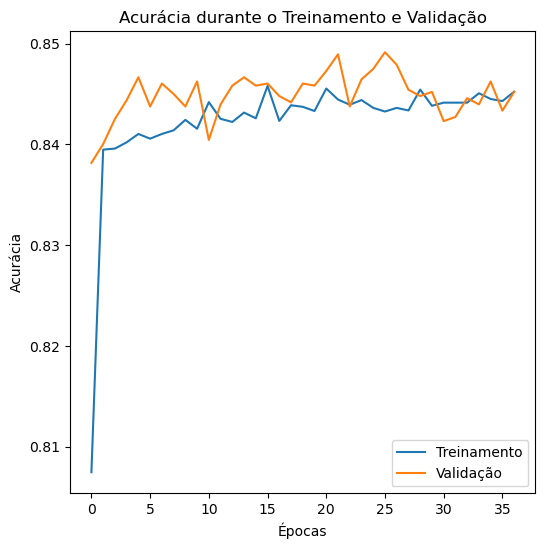

In [28]:
plt.figure(figsize=(6, 6))
plt.plot(r.history['accuracy'], label='Treinamento')
plt.plot(r.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

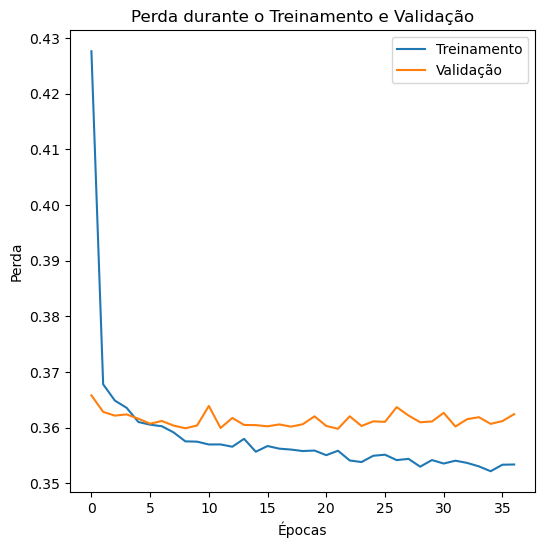

In [29]:
plt.figure(figsize=(6, 6))
plt.plot(r.history['loss'], label='Treinamento')
plt.plot(r.history['val_loss'], label='Validação')
plt.title('Perda durante o Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

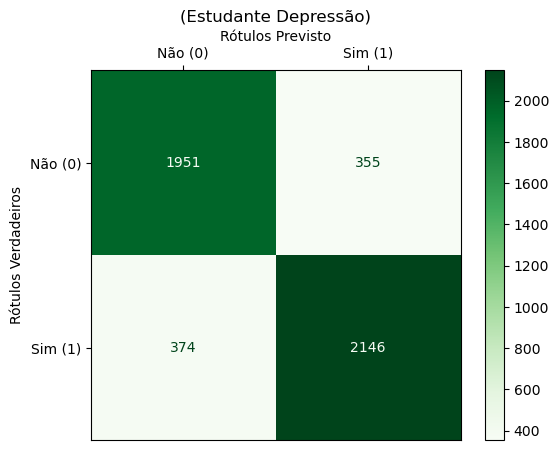

Acurácia: 84.89%


In [30]:
labels = ['Não (0)', 'Sim (1)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

fig, ax = plt.subplots()

disp.plot(cmap=plt.cm.Greens, ax=ax)

ax.xaxis.set_ticks_position('top')  
ax.xaxis.set_label_position('top')  

plt.xticks(rotation=0)  

plt.title("(Estudante Depressão)")  
plt.xlabel("Rótulos Previsto")  
plt.ylabel("Rótulos Verdadeiros")  

plt.show()

print(f"Acurácia: {ac:.2%}")

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2306
           1       0.86      0.85      0.85      2520

    accuracy                           0.85      4826
   macro avg       0.85      0.85      0.85      4826
weighted avg       0.85      0.85      0.85      4826

